In [2]:
#import every library out there
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from scipy.stats import expon
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from scipy import stats
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import datetime
from time import time
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding as LLE
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.manifold import Isomap
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')


# Load the Data

In [3]:
data = pd.read_csv('dgemm_cache_data.csv')
data

,test_name,iteration_name,iteration_guid,iteration_start_date,submitter_name,submitter_email,sut_name,bmc_name,bmc_version,dimm_slots_total,...,socket1_memory_manufacturers_count,socket1_memory_ranks_list,socket1_memory_ranks_count,iteration_stop_date,measurement_guid,processor_L1_cache_bytes_v2,processor_L2_cache_bytes_v2,processor_L3_cache_bytes_v2,iteration_start_year,iteration_start_month
0,dgemm-amd-v101-0,PDAT01: OPN478_A4-rev2-MM-MS11-fullRun_realNAT...,df3a58a8-80d2-4cd4-9f57-bdb2b6aa3733,2022-10-01T04:15:56Z,zack,zack@pmpd-quartz-b391-ms11.amd.com,pmpd-quartz-b391-ms11,quartz-b391.amd.com,2.17,24,...,1.0,2R,1.0,2022-10-01T15:01:33Z,NaN,NaN,NaN,NaN,2022,10
1,dgemm-amd-v101-0,PDAT01: 9454 48-Core Processor-PR-MM-290W 1002...,3e027c47-5f0d-4c3c-a209-7e534bf52732,2022-10-01T02:35:39Z,bob,bob@svtausox6655.amd.com,svtausox6655,quartz-be8d.amd.com,2.17,24,...,1.0,2R,1.0,2022-10-01T19:53:54Z,NaN,NaN,NaN,NaN,2022,10
2,dgemm-amd-v101-0,PDAT01: 9454 48-Core Processor-PR-MM-290W 1002...,f5d2d972-e691-4802-95cd-34d65ee34612,2022-10-01T02:35:39Z,bob,bob@svtausox6655.amd.com,svtausox6655,quartz-be8d.amd.com,2.17,24,...,1.0,2R,1.0,2022-10-01T19:55:36Z,NaN,NaN,NaN,NaN,2022,10
3,dgemm-amd-v101-0,PDAT01: 9454 48-Core Processor-PR-MM-290W 1002...,f314062c-96d8-4633-8f91-b106dd96d1e7,2022-10-01T02:35:39Z,bob,bob@svtausox6655.amd.com,svtausox6655,quartz-be8d.amd.com,2.17,24,...,1.0,2R,1.0,2022-10-01T19:57:17Z,NaN,NaN,NaN,NaN,2022,10
4,dgemm-amd-v101-0,NO_PREFIX: Model:9D64 BIOS:RTI1003C (defaults)...,9a6e3bfe-c75a-4bdb-822c-28c039125d78,2022-11-13T15:20:45Z,vd.p,vd.p@titanite-1906,titanite-1906,titanite-1906.sppo,2.17,14,...,NaN,NaN,NaN,2022-11-13T15:22:21Z,NaN,NaN,NaN,NaN,2022,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15993,dgemm-amd-v101-0,PDAT01: 8534PN 32-Core-PR-MM-COL on 10.47.7.17...,801470b6-d5a9-493d-bb00-99515d221069,2023-07-07T19:41:41Z,bob,bob@pg-cinbr-3151.amd.com,pg-cinbr-3151,cinnabar-3151.amd.com,2.17,12,...,NaN,NaN,NaN,2023-07-08T13:34:44Z,35b72d36-dc8c-4514-b86b-14229911eca3,2097152.0,33554432.0,134217728.0,2023,7
15994,dgemm-amd-v101-0,PDAT01: 8534PN 32-Core-PR-MM-COL on 10.47.7.17...,9f519a32-ca61-4b29-83cb-0b6c9d4f5c5d,2023-07-15T08:32:14Z,bob,bob@pg-cinbr-3151.amd.com,pg-cinbr-3151,cinnabar-3151.amd.com,2.17,12,...,NaN,NaN,NaN,2023-07-16T05:21:55Z,06c33e8c-2fa9-404b-8aa4-eea04ad17f61,3145728.0,50331648.0,134217728.0,2023,7
15995,dgemm-amd-v101-0,PDAT01: 8434P 48-Core-PR-MM-200W SMT On COL on...,b6ccaac8-ad98-443b-ae51-bb83f3d1a1cd,2023-06-02T19:08:05Z,bob,bob@pgcinbr3071,pgcinbr3071,cinnabar-3071.amd.com,2.17,12,...,NaN,NaN,NaN,2023-06-04T01:12:26Z,48b7b6f9-4f51-4616-a6dd-769c645dee56,3145728.0,50331648.0,134217728.0,2023,6
15996,dgemm-amd-v101-0,PDAT01: 8434P 48-Core-PR-MM-200W SMT On COL on...,50f923d0-8c60-4596-ae61-b5c3109592df,2023-06-02T19:08:05Z,bob,bob@pgcinbr3071,pgcinbr3071,cinnabar-3071.amd.com,2.17,12,...,NaN,NaN,NaN,2023-06-04T01:18:41Z,c296c5d0-4853-432d-ab76-040d19cf1154,3145728.0,50331648.0,134217728.0,2023,6


In [4]:
data.columns

Index(['test_name', 'iteration_name', 'iteration_guid', 'iteration_start_date',
       'submitter_name', 'submitter_email', 'sut_name', 'bmc_name',
       'bmc_version', 'dimm_slots_total',
       ...
       'socket1_memory_manufacturers_count', 'socket1_memory_ranks_list',
       'socket1_memory_ranks_count', 'iteration_stop_date', 'measurement_guid',
       'processor_L1_cache_bytes_v2', 'processor_L2_cache_bytes_v2',
       'processor_L3_cache_bytes_v2', 'iteration_start_year',
       'iteration_start_month'],
      dtype='object', length=153)

array([[<Axes: title={'center': 'bmc_version'}>,
        <Axes: title={'center': 'dimm_slots_total'}>,
        <Axes: title={'center': 'dimm_slots_populated'}>,
        <Axes: title={'center': 'memory_channels_total'}>,
        <Axes: title={'center': 'memory_channels_populated'}>,
        <Axes: title={'center': 'dimms_per_channel'}>,
        <Axes: title={'center': 'socket0_fclk_mhz'}>,
        <Axes: title={'center': 'socket0_mclk_mhz'}>],
       [<Axes: title={'center': 'socket0_cclk_mhz'}>,
        <Axes: title={'center': 'socket0_lclk_mhz'}>,
        <Axes: title={'center': 'socket0_uclk_mhz'}>,
        <Axes: title={'center': 'socket0_ccd000_die_number'}>,
        <Axes: title={'center': 'ctdp_in_watts'}>,
        <Axes: title={'center': 'smbios_processor_frequency_in_mhz'}>,
        <Axes: title={'center': 'numa_zones'}>,
        <Axes: title={'center': 'packages'}>],
       [<Axes: title={'center': 'processor_family'}>,
        <Axes: title={'center': 'processor_model'}>,
    

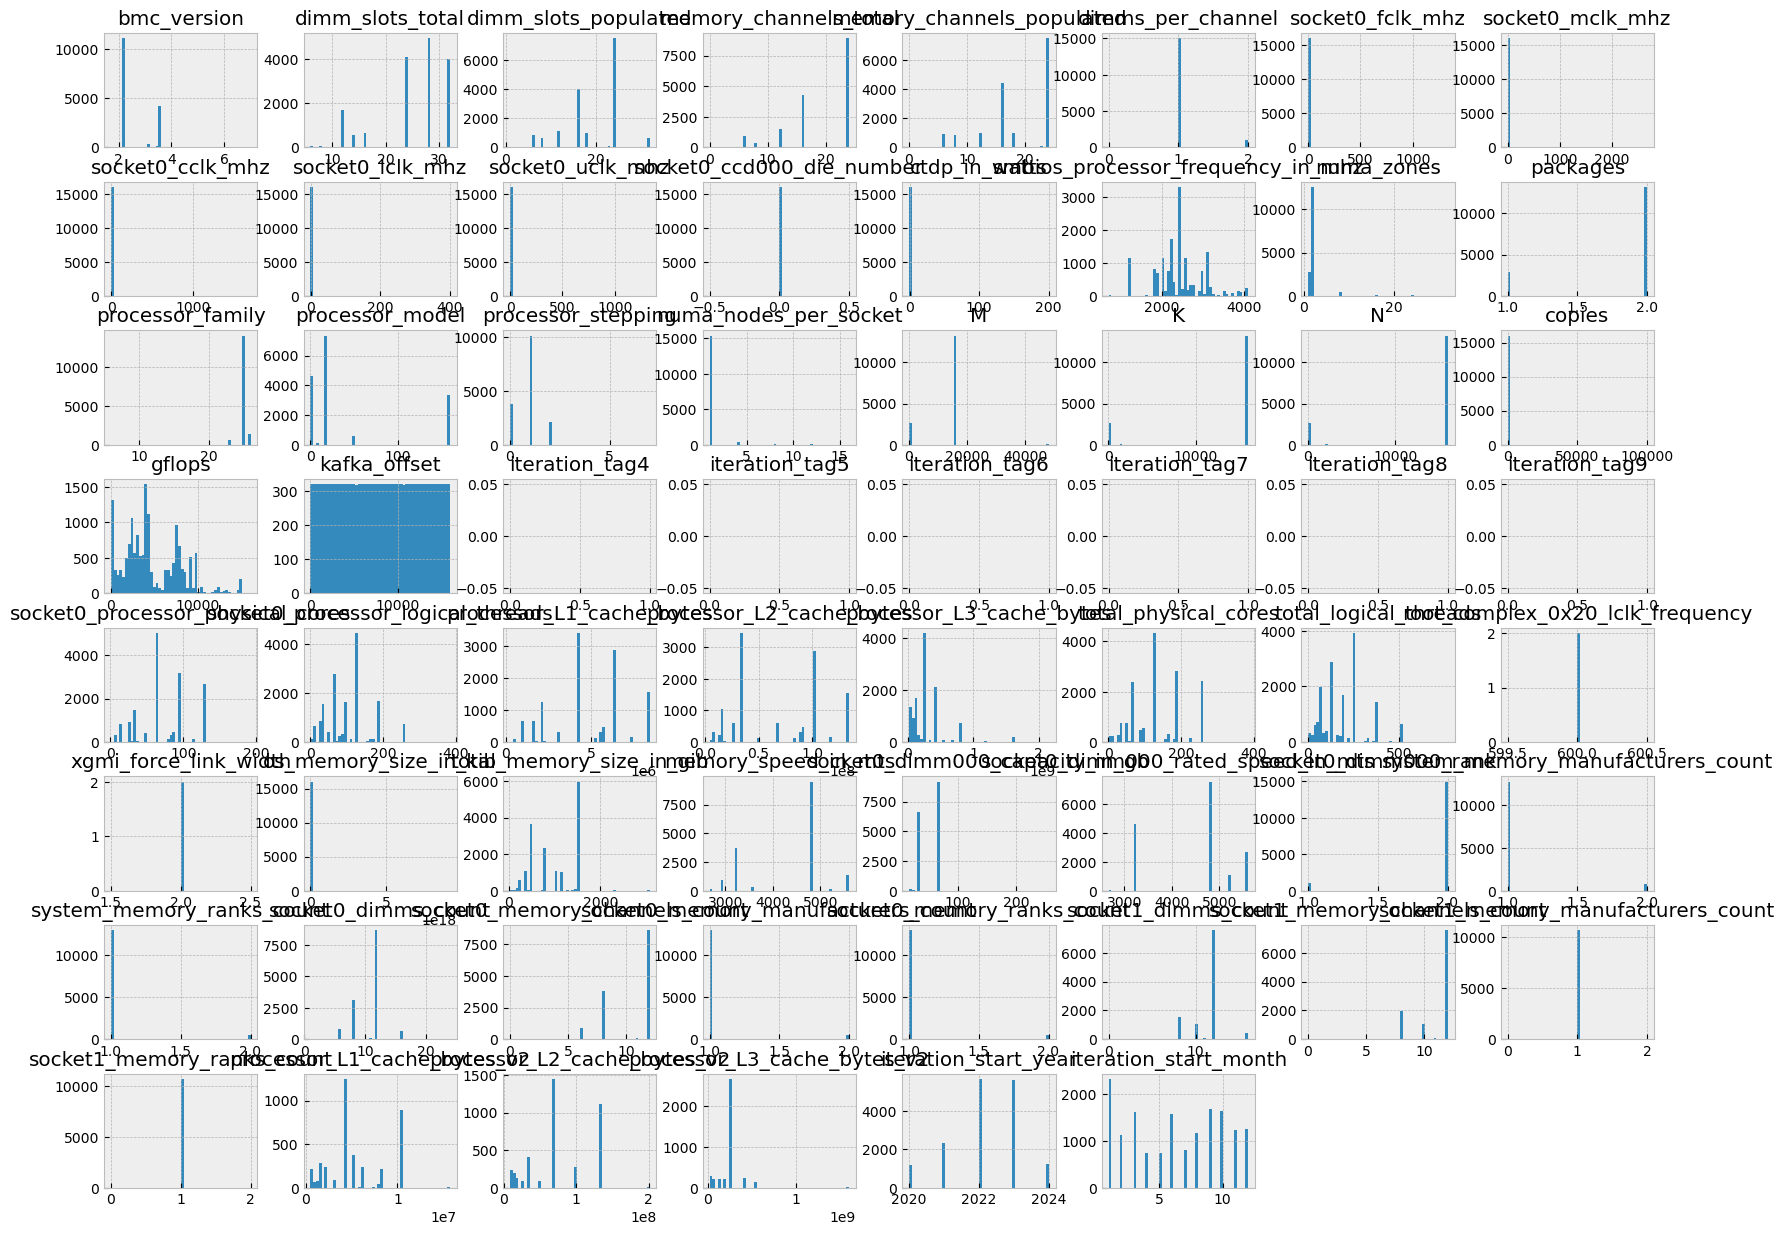

In [5]:
data.hist(bins=50, figsize=(20,15))

# Lets Check the Correlations 

In [6]:
#We can compute the (linear) Pearson's correlation coefficient between pairs of attributes
#with the method corr() :

corr_matrix = data.corr(method='pearson',numeric_only=True)
corr_matrix

,bmc_version,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,...,socket0_memory_ranks_count,socket1_dimms_count,socket1_memory_channels_count,socket1_memory_manufacturers_count,socket1_memory_ranks_count,processor_L1_cache_bytes_v2,processor_L2_cache_bytes_v2,processor_L3_cache_bytes_v2,iteration_start_year,iteration_start_month
bmc_version,1.000000,0.418310,-0.179376,-0.457786,-0.382683,0.322108,0.017813,0.017813,0.017813,0.017813,...,-0.086388,-0.362105,-0.827173,0.014368,0.003084,-0.276789,-0.412041,-0.065833,-0.659922,0.104640
dimm_slots_total,0.418310,1.000000,0.581123,0.498806,0.535895,0.050418,-0.027015,-0.027015,-0.027015,-0.027015,...,-0.006594,-0.105229,-0.435384,0.012643,0.006928,0.329469,0.382228,0.376464,-0.404483,0.009871
dimm_slots_populated,-0.179376,0.581123,1.000000,0.778698,0.847102,0.285149,-0.035705,-0.035705,-0.035705,-0.035705,...,0.127749,0.984426,0.580470,0.044794,0.049316,0.569685,0.606556,0.414974,0.044677,-0.069966
memory_channels_total,-0.457786,0.498806,0.778698,1.000000,0.944327,-0.266496,-0.037670,-0.037670,-0.037670,-0.037670,...,0.130197,0.359865,0.828664,-0.014213,-0.003062,0.505174,0.592495,0.404445,0.209317,-0.122678
memory_channels_populated,-0.382683,0.535895,0.847102,0.944327,1.000000,-0.236224,-0.035114,-0.035114,-0.035114,-0.035114,...,0.152114,0.591202,0.981265,0.035797,0.052510,0.640085,0.694591,0.433284,0.152222,-0.133112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
processor_L1_cache_bytes_v2,-0.276789,0.329469,0.569685,0.505174,0.640085,-0.266977,NaN,NaN,NaN,NaN,...,NaN,0.462025,0.612498,-0.010509,-0.010509,1.000000,0.971727,0.289439,0.759854,-0.711870
processor_L2_cache_bytes_v2,-0.412041,0.382228,0.606556,0.592495,0.694591,-0.323302,NaN,NaN,NaN,NaN,...,NaN,0.485325,0.673788,-0.001897,-0.001897,0.971727,1.000000,0.294494,0.688175,-0.692477
processor_L3_cache_bytes_v2,-0.065833,0.376464,0.414974,0.404445,0.433284,-0.094935,NaN,NaN,NaN,NaN,...,NaN,0.118125,0.170331,-0.016059,-0.016059,0.289439,0.294494,1.000000,0.133430,-0.248441
iteration_start_year,-0.659922,-0.404483,0.044677,0.209317,0.152222,-0.132614,-0.035412,-0.035412,-0.035412,-0.035412,...,-0.137869,0.127184,0.327228,-0.017301,-0.013834,0.759854,0.688175,0.133430,1.000000,-0.444807


In [7]:
data['processor_L1_cache_bytes_v2']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
15993    2097152.0
15994    3145728.0
15995    3145728.0
15996    3145728.0
15997    3145728.0
Name: processor_L1_cache_bytes_v2, Length: 15998, dtype: float64

In [8]:
unique_values = data['processor_L2_cache_bytes_v2'].unique()

print(unique_values)

[           nan 1.67772160e+07 1.00663296e+08 3.35544320e+07
 6.71088640e+07 1.34217728e+08 5.03316480e+07 8.38860800e+06
 2.51658240e+07 2.01326592e+08 1.25829120e+07 9.22746880e+07
 1.17440512e+08 1.32120576e+08]


In [9]:
!pip install sweetviz

In [10]:
import sweetviz as sv

report = sv.analyze(data)
report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# High Level Data Pre-Processing

## Cutting out non Numeric columns 

In [11]:
df=data
# Assuming df is your DataFrame and non_numeric_columns is a list of columns
non_numeric_columns = df.select_dtypes(exclude=[np.number, 'boolean']).columns
non_numeric_columns


Index(['test_name', 'iteration_name', 'iteration_guid', 'iteration_start_date',
       'submitter_name', 'submitter_email', 'sut_name', 'bmc_name',
       'socket0_name', 'socket0_iod_name', 'socket0_iod_serial_number',
       'socket0_ccd000_serial_number', 'socket0_ccd000_name',
       'socket0_ccd000_short_name', 'os_name', 'os_version', 'kernel_name',
       'kernel_version', 'cpufreq_scaling_governor',
       'transparent_hugepage_enabled', 'transparent_hugepage_defrag',
       'bios_name', 'bios_version', 'smbios_bios_version',
       'smbios_processor_family', 'smbios_processor_version', 'processor_name',
       'kafka_topic', 'kafka_timestamp', 'curator_received', 'iteration_tag0',
       'iteration_tag1', 'iteration_tag2', 'iteration_tag3',
       'socket1_iod_serial_number', 'kernel_command_line', 'kernel_iommu_pt',
       'apbdis', 'df_pstate_frequency_optimizer',
       'df_pstate_latency_optimizer', 'dlwm_support', 'determinism_control',
       'determinism_slider', 'fixed

In [12]:
df_cleaned = df.drop(columns=non_numeric_columns)
# Check the resulting DataFrame
df_cleaned

,bmc_version,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,...,socket0_memory_ranks_count,socket1_dimms_count,socket1_memory_channels_count,socket1_memory_manufacturers_count,socket1_memory_ranks_count,processor_L1_cache_bytes_v2,processor_L2_cache_bytes_v2,processor_L3_cache_bytes_v2,iteration_start_year,iteration_start_month
0,2.17,24,24,24,24,1,-1,-1,-1,-1,...,1.0,12.0,12.0,1.0,1.0,NaN,NaN,NaN,2022,10
1,2.17,24,24,24,24,1,-1,-1,-1,-1,...,1.0,12.0,12.0,1.0,1.0,NaN,NaN,NaN,2022,10
2,2.17,24,24,24,24,1,-1,-1,-1,-1,...,1.0,12.0,12.0,1.0,1.0,NaN,NaN,NaN,2022,10
3,2.17,24,24,24,24,1,-1,-1,-1,-1,...,1.0,12.0,12.0,1.0,1.0,NaN,NaN,NaN,2022,10
4,2.17,14,8,12,8,1,-1,-1,-1,-1,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15993,2.17,12,6,6,6,1,-1,-1,-1,-1,...,1.0,NaN,NaN,NaN,NaN,2097152.0,33554432.0,134217728.0,2023,7
15994,2.17,12,6,6,6,1,-1,-1,-1,-1,...,1.0,NaN,NaN,NaN,NaN,3145728.0,50331648.0,134217728.0,2023,7
15995,2.17,12,6,6,6,1,-1,-1,-1,-1,...,1.0,NaN,NaN,NaN,NaN,3145728.0,50331648.0,134217728.0,2023,6
15996,2.17,12,6,6,6,1,-1,-1,-1,-1,...,1.0,NaN,NaN,NaN,NaN,3145728.0,50331648.0,134217728.0,2023,6


In [13]:
df_cleaned.columns

Index(['bmc_version', 'dimm_slots_total', 'dimm_slots_populated',
       'memory_channels_total', 'memory_channels_populated',
       'dimms_per_channel', 'socket0_fclk_mhz', 'socket0_mclk_mhz',
       'socket0_cclk_mhz', 'socket0_lclk_mhz', 'socket0_uclk_mhz',
       'socket0_ccd000_die_number', 'smt_enabled', 'cpu_turbo_enabled',
       'ctdp_in_watts', 'power_determinism_mode_enabled',
       'patrol_scrub_enabled', 'optimized_defaults',
       'smbios_processor_frequency_in_mhz', 'numa_zones', 'packages',
       'processor_family', 'processor_model', 'processor_stepping',
       'numa_nodes_per_socket', 'l3_as_numa', 'M', 'K', 'N', 'copies',
       'gflops', 'kafka_offset', 'iteration_tag4', 'iteration_tag5',
       'iteration_tag6', 'iteration_tag7', 'iteration_tag8', 'iteration_tag9',
       'socket0_processor_physical_cores', 'socket0_processor_logical_threads',
       'processor_L1_cache_bytes', 'processor_L2_cache_bytes',
       'processor_L3_cache_bytes', 'total_physical_core

In [14]:
data = df_cleaned 

##  Remove Columns with Low Variance:


In [15]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# Assuming df is your DataFrame with mixed data types
threshold = 0.01  # Adjust the threshold based on your criteria

# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns

# Apply variance threshold to numeric columns
numeric_selector = VarianceThreshold(threshold)
df_numeric_cleaned = data[numeric_cols].loc[:, numeric_selector.fit(data[numeric_cols]).get_support()]

# Keep non-numeric columns
df_non_numeric = data[non_numeric_cols]

# Concatenate the cleaned numeric and non-numeric DataFrames
df_cleaned = pd.concat([df_numeric_cleaned, df_non_numeric], axis=1)
df_cleaned

,bmc_version,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,...,processor_L2_cache_bytes_v2,processor_L3_cache_bytes_v2,iteration_start_year,iteration_start_month,smt_enabled,cpu_turbo_enabled,power_determinism_mode_enabled,patrol_scrub_enabled,optimized_defaults,l3_as_numa
0,2.17,24,24,24,24,1,-1,-1,-1,-1,...,NaN,NaN,2022,10,True,False,False,False,False,False
1,2.17,24,24,24,24,1,-1,-1,-1,-1,...,NaN,NaN,2022,10,True,False,False,False,False,False
2,2.17,24,24,24,24,1,-1,-1,-1,-1,...,NaN,NaN,2022,10,True,False,False,False,False,False
3,2.17,24,24,24,24,1,-1,-1,-1,-1,...,NaN,NaN,2022,10,True,False,False,False,False,False
4,2.17,14,8,12,8,1,-1,-1,-1,-1,...,NaN,NaN,2022,11,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15993,2.17,12,6,6,6,1,-1,-1,-1,-1,...,33554432.0,134217728.0,2023,7,True,False,False,False,False,False
15994,2.17,12,6,6,6,1,-1,-1,-1,-1,...,50331648.0,134217728.0,2023,7,True,False,False,False,False,False
15995,2.17,12,6,6,6,1,-1,-1,-1,-1,...,50331648.0,134217728.0,2023,6,True,False,False,False,False,False
15996,2.17,12,6,6,6,1,-1,-1,-1,-1,...,50331648.0,134217728.0,2023,6,True,False,False,False,False,False


In [16]:
df_cleaned.columns


Index(['bmc_version', 'dimm_slots_total', 'dimm_slots_populated',
       'memory_channels_total', 'memory_channels_populated',
       'dimms_per_channel', 'socket0_fclk_mhz', 'socket0_mclk_mhz',
       'socket0_cclk_mhz', 'socket0_lclk_mhz', 'socket0_uclk_mhz',
       'ctdp_in_watts', 'smbios_processor_frequency_in_mhz', 'numa_zones',
       'packages', 'processor_family', 'processor_model', 'processor_stepping',
       'numa_nodes_per_socket', 'M', 'K', 'N', 'copies', 'gflops',
       'kafka_offset', 'socket0_processor_physical_cores',
       'socket0_processor_logical_threads', 'processor_L1_cache_bytes',
       'processor_L2_cache_bytes', 'processor_L3_cache_bytes',
       'total_physical_cores', 'total_logical_threads',
       'os_memory_size_in_kib', 'total_memory_size_in_gib',
       'memory_speed_in_mts', 'socket0_dimm000_capacity_in_gb',
       'socket0_dimm000_rated_speed_in_mts', 'socket0_dimm000_rank',
       'system_memory_manufacturers_count', 'system_memory_ranks_count',


In [17]:
df_cleaned['processor_L1_cache_bytes_v2']
unique_values = data['processor_L2_cache_bytes_v2'].unique()

print(unique_values)

[           nan 1.67772160e+07 1.00663296e+08 3.35544320e+07
 6.71088640e+07 1.34217728e+08 5.03316480e+07 8.38860800e+06
 2.51658240e+07 2.01326592e+08 1.25829120e+07 9.22746880e+07
 1.17440512e+08 1.32120576e+08]


In [18]:
df_cleaned['processor_L1_cache_bytes']
unique_values = data['processor_L2_cache_bytes'].unique()

print(unique_values)

[5.03316480e+07 9.22746880e+07 8.38860800e+06 2.51658240e+07
 1.34217728e+08 3.35544320e+07 1.00663296e+08 8.80803840e+07
 1.67772160e+07 6.71088640e+07 8.38860800e+07 1.25829120e+07
 1.17440512e+08 7.54974720e+07 4.19430400e+06 7.34003200e+07
 5.87202560e+07 4.40401920e+07 2.93601280e+07 1.46800640e+07
            nan 1.88743680e+07]


## Combining NEW and OLD processor_{level}_cache_bytes

In [19]:
import pandas as pd
df = df_cleaned
# Assuming df is your DataFrame
cache_levels = ['L1', 'L2', 'L3']

# Iterate over cache levels and combine columns
for level in cache_levels:
    column_without_suffix = f'processor_{level}_cache_bytes'
    column_with_suffix = f'processor_{level}_cache_bytes_v2'

    # Combine columns and fill NaN with corresponding without _v2 data
    df[f'combined_{level}_cache'] = df[column_with_suffix].combine_first(df[column_without_suffix])

# Drop original columns
columns_to_drop = [f'processor_{level}_cache_bytes' for level in cache_levels] + \
                  [f'processor_{level}_cache_bytes_v2' for level in cache_levels]
df = df.drop(columns=columns_to_drop)
df

,bmc_version,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,...,iteration_start_month,smt_enabled,cpu_turbo_enabled,power_determinism_mode_enabled,patrol_scrub_enabled,optimized_defaults,l3_as_numa,combined_L1_cache,combined_L2_cache,combined_L3_cache
0,2.17,24,24,24,24,1,-1,-1,-1,-1,...,10,True,False,False,False,False,False,3145728.0,50331648.0,134217728.0
1,2.17,24,24,24,24,1,-1,-1,-1,-1,...,10,True,False,False,False,False,False,3145728.0,50331648.0,268435456.0
2,2.17,24,24,24,24,1,-1,-1,-1,-1,...,10,True,False,False,False,False,False,3145728.0,50331648.0,268435456.0
3,2.17,24,24,24,24,1,-1,-1,-1,-1,...,10,True,False,False,False,False,False,3145728.0,50331648.0,268435456.0
4,2.17,14,8,12,8,1,-1,-1,-1,-1,...,11,False,False,False,False,False,False,5767168.0,92274688.0,184549376.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15993,2.17,12,6,6,6,1,-1,-1,-1,-1,...,7,True,False,False,False,False,False,2097152.0,33554432.0,134217728.0
15994,2.17,12,6,6,6,1,-1,-1,-1,-1,...,7,True,False,False,False,False,False,3145728.0,50331648.0,134217728.0
15995,2.17,12,6,6,6,1,-1,-1,-1,-1,...,6,True,False,False,False,False,False,3145728.0,50331648.0,134217728.0
15996,2.17,12,6,6,6,1,-1,-1,-1,-1,...,6,True,False,False,False,False,False,3145728.0,50331648.0,134217728.0


In [20]:
df.columns
df_cleaned = df
df_cleaned.columns
df_cleaned['combined_L1_cache']
unique_values = df_cleaned['combined_L1_cache'].unique()
unique_values
# print(unique_values)

array([ 3145728.,  5767168.,  1048576.,  1572864.,  8388608.,  4194304.,
        6291456.,  5505024.,  2097152.,  5242880.,  7340032.,  4718592.,
         524288.,  4587520.,  3670016.,  2752512.,  1835008.,   917504.,
         262144.,  1310720.,       nan,  7864320.,  2359296., 10485760.,
        2621440., 15728640., 10321920.])

##  Handling Missing Values:

In [21]:
import pandas as pd

# Assuming df is your DataFrame with mixed data types
threshold_missing = 0.5  # Adjust the threshold based on your criteria

# Separate numeric and non-numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
non_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns

# Drop columns with a high percentage of missing values for numeric columns
df_numeric_cleaned = df_cleaned[numeric_cols].dropna(axis=1, thresh=int((1 - threshold_missing) * len(df_cleaned[numeric_cols])))

# Impute missing values for remaining numeric columns
df_numeric_cleaned = df_numeric_cleaned.fillna(df_numeric_cleaned.mean())

# Keep non-numeric columns
df_non_numeric = df_cleaned[non_numeric_cols]

# Concatenate the cleaned numeric and non-numeric DataFrames
df_cleaned = pd.concat([df_numeric_cleaned, df_non_numeric], axis=1)
df_cleaned

,bmc_version,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,...,iteration_start_month,combined_L1_cache,combined_L2_cache,combined_L3_cache,smt_enabled,cpu_turbo_enabled,power_determinism_mode_enabled,patrol_scrub_enabled,optimized_defaults,l3_as_numa
0,2.17,24,24,24,24,1,-1,-1,-1,-1,...,10,3145728.0,50331648.0,134217728.0,True,False,False,False,False,False
1,2.17,24,24,24,24,1,-1,-1,-1,-1,...,10,3145728.0,50331648.0,268435456.0,True,False,False,False,False,False
2,2.17,24,24,24,24,1,-1,-1,-1,-1,...,10,3145728.0,50331648.0,268435456.0,True,False,False,False,False,False
3,2.17,24,24,24,24,1,-1,-1,-1,-1,...,10,3145728.0,50331648.0,268435456.0,True,False,False,False,False,False
4,2.17,14,8,12,8,1,-1,-1,-1,-1,...,11,5767168.0,92274688.0,184549376.0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15993,2.17,12,6,6,6,1,-1,-1,-1,-1,...,7,2097152.0,33554432.0,134217728.0,True,False,False,False,False,False
15994,2.17,12,6,6,6,1,-1,-1,-1,-1,...,7,3145728.0,50331648.0,134217728.0,True,False,False,False,False,False
15995,2.17,12,6,6,6,1,-1,-1,-1,-1,...,6,3145728.0,50331648.0,134217728.0,True,False,False,False,False,False
15996,2.17,12,6,6,6,1,-1,-1,-1,-1,...,6,3145728.0,50331648.0,134217728.0,True,False,False,False,False,False


In [22]:
df_cleaned.columns

Index(['bmc_version', 'dimm_slots_total', 'dimm_slots_populated',
       'memory_channels_total', 'memory_channels_populated',
       'dimms_per_channel', 'socket0_fclk_mhz', 'socket0_mclk_mhz',
       'socket0_cclk_mhz', 'socket0_lclk_mhz', 'socket0_uclk_mhz',
       'ctdp_in_watts', 'smbios_processor_frequency_in_mhz', 'numa_zones',
       'packages', 'processor_family', 'processor_model', 'processor_stepping',
       'numa_nodes_per_socket', 'M', 'K', 'N', 'copies', 'gflops',
       'kafka_offset', 'socket0_processor_physical_cores',
       'socket0_processor_logical_threads', 'total_physical_cores',
       'total_logical_threads', 'os_memory_size_in_kib',
       'total_memory_size_in_gib', 'memory_speed_in_mts',
       'socket0_dimm000_capacity_in_gb', 'socket0_dimm000_rated_speed_in_mts',
       'socket0_dimm000_rank', 'system_memory_manufacturers_count',
       'system_memory_ranks_count', 'socket0_dimms_count',
       'socket0_memory_channels_count', 'socket0_memory_manufacturer

##  Check Correlation:

In [23]:
import pandas as pd

# Assuming df_cleaned is your DataFrame with mixed data types
threshold_correlation = 0.8  # Adjust the correlation threshold

# Separate numeric and non-numeric columns
#numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
#non_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns

# Calculate correlation matrix for numeric columns
correlation_matrix_numeric = df_cleaned.corr()
correlation_matrix_numeric
# Identify highly correlated columns
highly_correlated = set()
for i in range(len(correlation_matrix_numeric.columns)):
    for j in range(i):
        if abs(correlation_matrix_numeric.iloc[i, j]) > threshold_correlation:
            colname = correlation_matrix_numeric.columns[i]
            highly_correlated.add(colname)
highly_correlated
# Drop highly correlated columns for numeric columns
#df_cleaned_numeric = df_cleaned[numeric_cols].drop(columns=highly_correlated)

# # Concatenate cleaned numeric and non-numeric DataFrames
# df_cleaned = pd.concat([df_cleaned_numeric, df_cleaned[non_numeric_cols]], axis=1)
# df_cleaned

{'K',
 'N',
 'combined_L1_cache',
 'combined_L2_cache',
 'copies',
 'cpu_turbo_enabled',
 'ctdp_in_watts',
 'iteration_start_year',
 'l3_as_numa',
 'memory_channels_populated',
 'memory_speed_in_mts',
 'numa_nodes_per_socket',
 'optimized_defaults',
 'os_memory_size_in_kib',
 'packages',
 'power_determinism_mode_enabled',
 'socket0_cclk_mhz',
 'socket0_dimm000_rated_speed_in_mts',
 'socket0_lclk_mhz',
 'socket0_mclk_mhz',
 'socket0_memory_manufacturers_count',
 'socket0_memory_ranks_count',
 'socket0_uclk_mhz',
 'system_memory_ranks_count',
 'total_logical_threads',
 'total_physical_cores'}

In [24]:
df_cleaned.describe()

,bmc_version,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,...,socket0_memory_channels_count,socket0_memory_manufacturers_count,socket0_memory_ranks_count,socket1_dimms_count,socket1_memory_channels_count,iteration_start_year,iteration_start_month,combined_L1_cache,combined_L2_cache,combined_L3_cache
count,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,...,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,1.599800e+04,1.599800e+04,1.599800e+04
mean,2.567524,25.155894,19.459120,19.296412,18.635517,1.061945,-0.499687,0.000625,-0.362045,-0.849606,...,10.422994,1.038447,1.037255,11.337943,11.019527,2022.210776,6.335917,4.949949e+06,6.895808e+07,2.825820e+08
std,0.611639,6.564919,6.216685,5.808688,5.867042,0.241840,25.830376,51.660752,32.936634,7.764603,...,1.996366,0.176113,0.173469,1.467590,1.349036,1.026962,3.681147,2.528451e+06,4.233413e+07,2.356291e+08
min,1.710000,6.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,2020.000000,1.000000,2.621440e+05,4.194304e+06,1.677722e+07
25%,2.170000,24.000000,16.000000,16.000000,16.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8.000000,1.000000,1.000000,11.337943,11.019527,2022.000000,3.000000,3.145728e+06,3.355443e+07,1.342177e+08
50%,2.170000,28.000000,24.000000,24.000000,18.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,12.000000,1.000000,1.000000,11.337943,11.019527,2022.000000,6.000000,4.194304e+06,6.710886e+07,2.684355e+08
75%,3.510000,28.000000,24.000000,24.000000,24.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,12.000000,1.000000,1.000000,12.000000,12.000000,2023.000000,10.000000,6.291456e+06,1.006633e+08,2.684355e+08
max,7.000000,32.000000,32.000000,24.000000,24.000000,2.000000,1333.000000,2667.000000,1700.000000,400.000000,...,12.000000,2.000000,2.000000,16.000000,12.000000,2024.000000,12.000000,1.572864e+07,2.013266e+08,2.147484e+09


In [25]:
df_cleaned.columns

Index(['bmc_version', 'dimm_slots_total', 'dimm_slots_populated',
       'memory_channels_total', 'memory_channels_populated',
       'dimms_per_channel', 'socket0_fclk_mhz', 'socket0_mclk_mhz',
       'socket0_cclk_mhz', 'socket0_lclk_mhz', 'socket0_uclk_mhz',
       'ctdp_in_watts', 'smbios_processor_frequency_in_mhz', 'numa_zones',
       'packages', 'processor_family', 'processor_model', 'processor_stepping',
       'numa_nodes_per_socket', 'M', 'K', 'N', 'copies', 'gflops',
       'kafka_offset', 'socket0_processor_physical_cores',
       'socket0_processor_logical_threads', 'total_physical_cores',
       'total_logical_threads', 'os_memory_size_in_kib',
       'total_memory_size_in_gib', 'memory_speed_in_mts',
       'socket0_dimm000_capacity_in_gb', 'socket0_dimm000_rated_speed_in_mts',
       'socket0_dimm000_rank', 'system_memory_manufacturers_count',
       'system_memory_ranks_count', 'socket0_dimms_count',
       'socket0_memory_channels_count', 'socket0_memory_manufacturer

In [26]:
#We can compute the (linear) Pearson's correlation coefficient between pairs of attributes
#with the method corr() :
regression_data = df_cleaned
corr_matrix = regression_data.corr(method='pearson',numeric_only=True)
corr_matrix

,bmc_version,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,...,iteration_start_month,combined_L1_cache,combined_L2_cache,combined_L3_cache,smt_enabled,cpu_turbo_enabled,power_determinism_mode_enabled,patrol_scrub_enabled,optimized_defaults,l3_as_numa
bmc_version,1.000000,0.410530,-0.177641,-0.453632,-0.379094,0.321978,1.781339e-02,1.781339e-02,1.781339e-02,1.781339e-02,...,0.103980,-0.407212,-0.636475,0.053944,-0.167129,1.781339e-02,1.781339e-02,NaN,1.781339e-02,0.043066
dimm_slots_total,0.410530,1.000000,0.581123,0.498806,0.535895,0.050418,-2.701527e-02,-2.701527e-02,-2.701527e-02,-2.701527e-02,...,0.009871,-0.053601,-0.141522,0.129632,-0.297010,-2.701527e-02,-2.701527e-02,NaN,-2.701527e-02,0.044899
dimm_slots_populated,-0.177641,0.581123,1.000000,0.778698,0.847102,0.285149,-3.570510e-02,-3.570510e-02,-3.570510e-02,-3.570510e-02,...,-0.069966,0.290499,0.301773,0.174354,-0.033070,-3.570510e-02,-3.570510e-02,NaN,-3.570510e-02,0.014882
memory_channels_total,-0.453632,0.498806,0.778698,1.000000,0.944327,-0.266496,-3.767041e-02,-3.767041e-02,-3.767041e-02,-3.767041e-02,...,-0.122678,0.382105,0.478712,0.158774,0.006350,-3.767041e-02,-3.767041e-02,NaN,-3.767041e-02,0.016011
memory_channels_populated,-0.379094,0.535895,0.847102,0.944327,1.000000,-0.236224,-3.511375e-02,-3.511375e-02,-3.511375e-02,-3.511375e-02,...,-0.133112,0.372509,0.442421,0.198105,-0.067717,-3.511375e-02,-3.511375e-02,NaN,-3.511375e-02,0.028591
dimms_per_channel,0.321978,0.050418,0.285149,-0.266496,-0.236224,1.000000,-4.961547e-03,-4.961547e-03,-4.961547e-03,-4.961547e-03,...,0.101683,-0.133788,-0.222758,-0.038074,0.044784,-4.961547e-03,-4.961547e-03,NaN,-4.961547e-03,-0.024337
socket0_fclk_mhz,0.017813,-0.027015,-0.035705,-0.037670,-0.035114,-0.004962,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.008756,-0.005789,-0.016199,-0.001163,0.023640,1.000000e+00,1.000000e+00,NaN,1.000000e+00,-0.002190
socket0_mclk_mhz,0.017813,-0.027015,-0.035705,-0.037670,-0.035114,-0.004962,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.008756,-0.005789,-0.016199,-0.001163,0.023640,1.000000e+00,1.000000e+00,NaN,1.000000e+00,-0.002190
socket0_cclk_mhz,0.017813,-0.027015,-0.035705,-0.037670,-0.035114,-0.004962,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.008756,-0.005789,-0.016199,-0.001163,0.023640,1.000000e+00,1.000000e+00,NaN,1.000000e+00,-0.002190
socket0_lclk_mhz,0.017813,-0.027015,-0.035705,-0.037670,-0.035114,-0.004962,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.008756,-0.005789,-0.016199,-0.001163,0.023640,1.000000e+00,1.000000e+00,NaN,1.000000e+00,-0.002190


## Correlation with GFLOPS 

In [27]:
corr_matrix['gflops'].sort_values(ascending=True)

bmc_version                          -0.300423
smbios_processor_frequency_in_mhz    -0.275893
iteration_start_month                -0.250369
processor_stepping                   -0.203812
smt_enabled                          -0.194975
dimms_per_channel                    -0.117998
socket0_memory_manufacturers_count   -0.071865
system_memory_ranks_count            -0.068864
socket0_memory_ranks_count           -0.068296
socket0_dimm000_rank                 -0.050150
os_memory_size_in_kib                -0.022405
combined_L3_cache                    -0.020345
optimized_defaults                   -0.020224
cpu_turbo_enabled                    -0.020224
power_determinism_mode_enabled       -0.020224
ctdp_in_watts                        -0.020224
socket0_lclk_mhz                     -0.020224
socket0_uclk_mhz                     -0.020224
socket0_mclk_mhz                     -0.020224
socket0_fclk_mhz                     -0.020224
socket0_cclk_mhz                     -0.020224
copies       

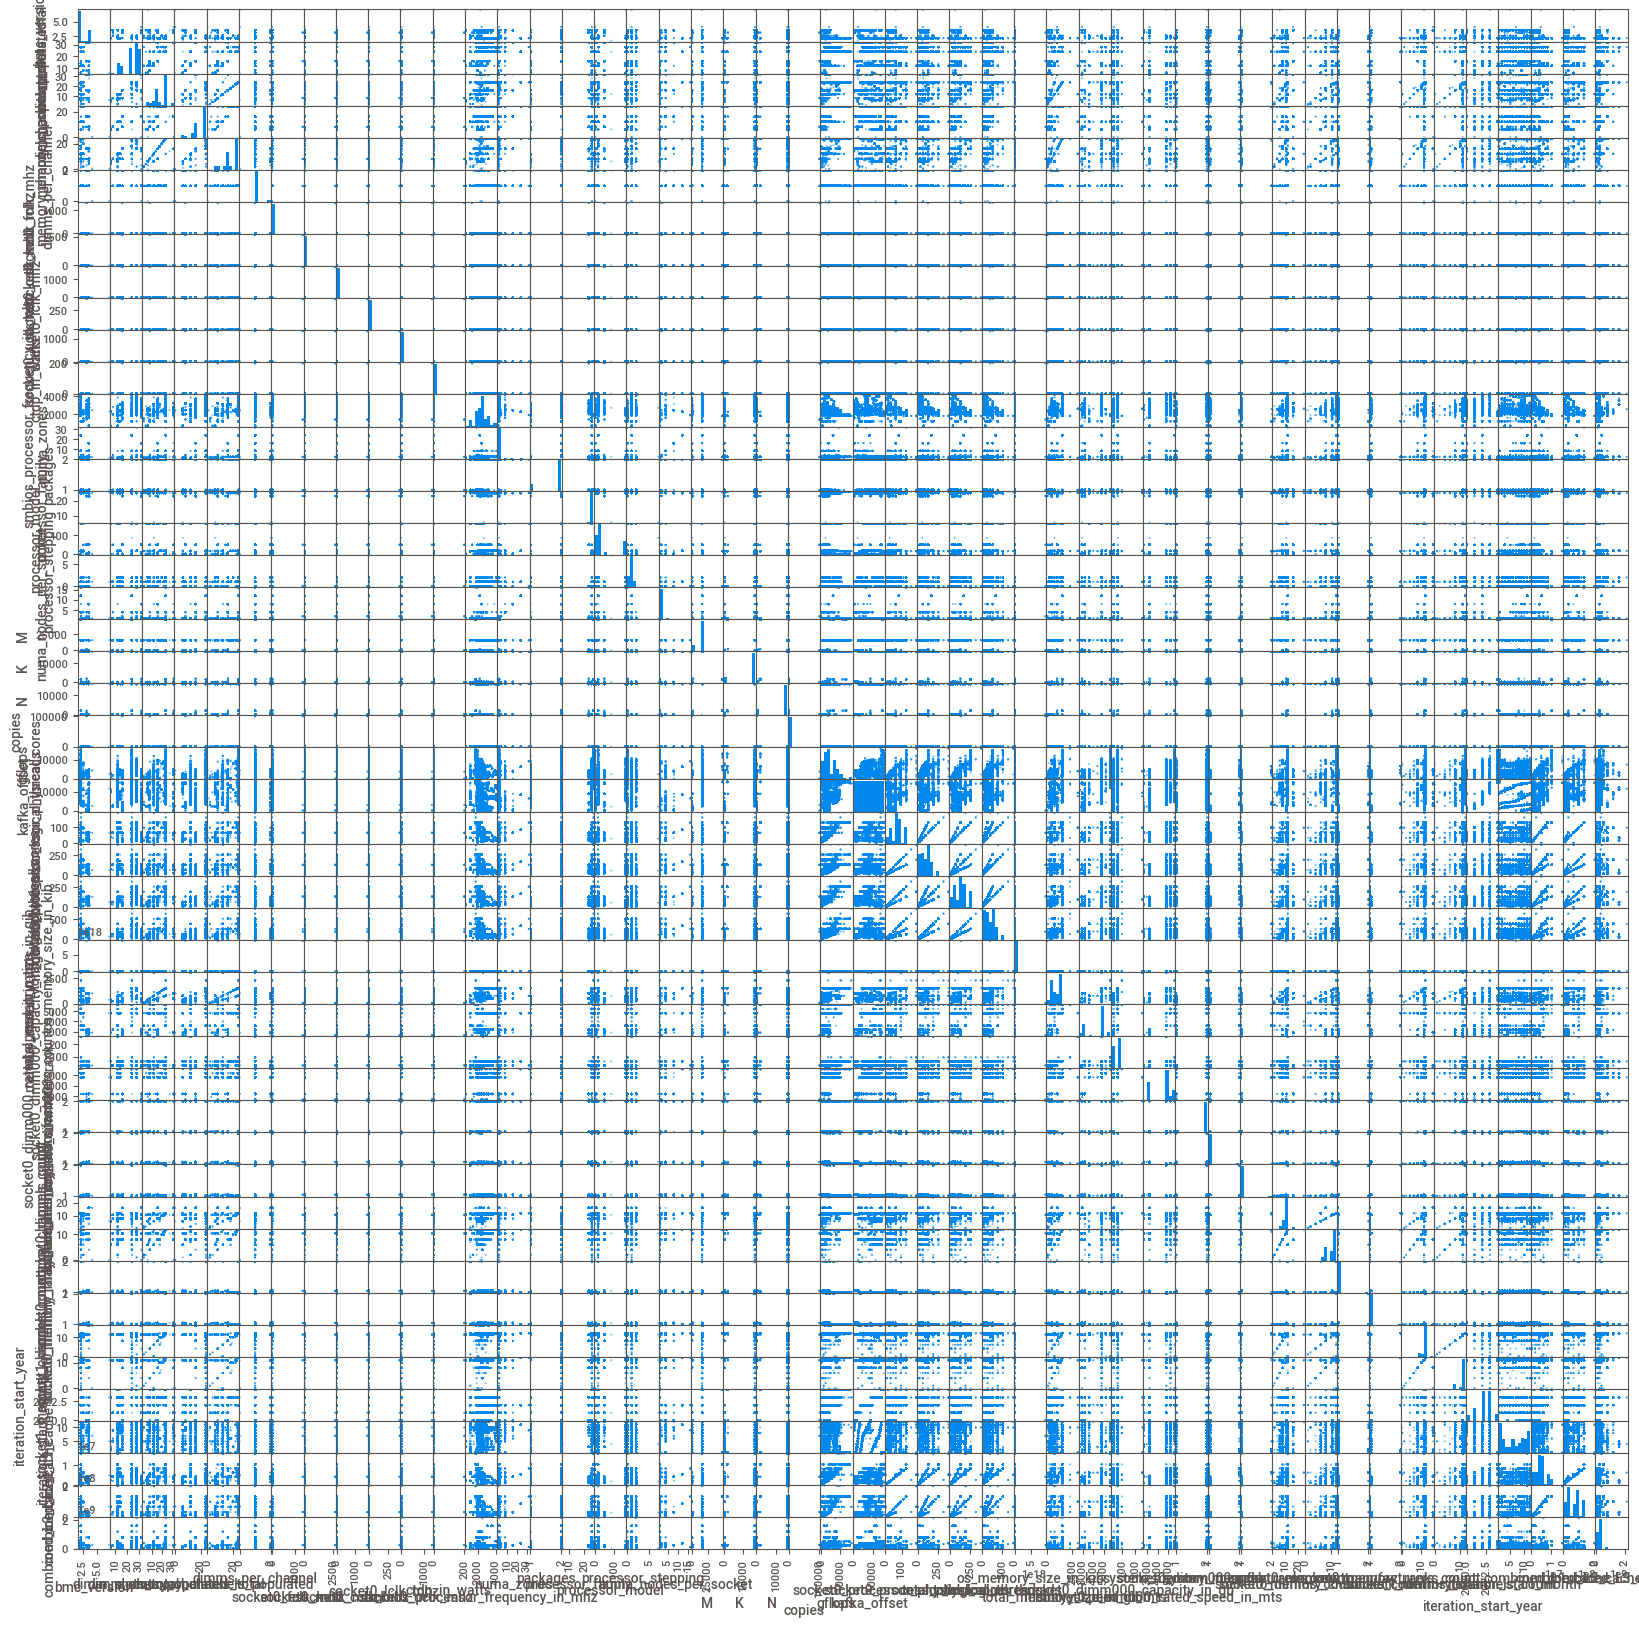

In [28]:
# Select only numeric columns for scatter matrix
numeric_columns = regression_data.select_dtypes(include='number')

# Plot scatter matrix
scatter_matrix(numeric_columns, figsize=(20, 20))
plt.show()


<Axes: xlabel='memory_speed_in_mts', ylabel='total_memory_size_in_gib'>

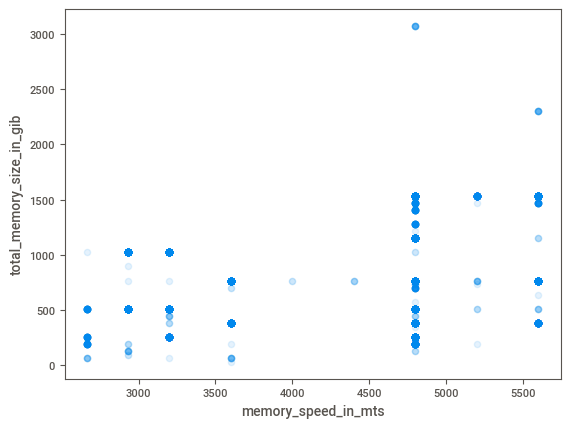

In [29]:
regression_data.plot(kind='scatter', x='memory_speed_in_mts', y='total_memory_size_in_gib', alpha=0.1)

<Axes: >

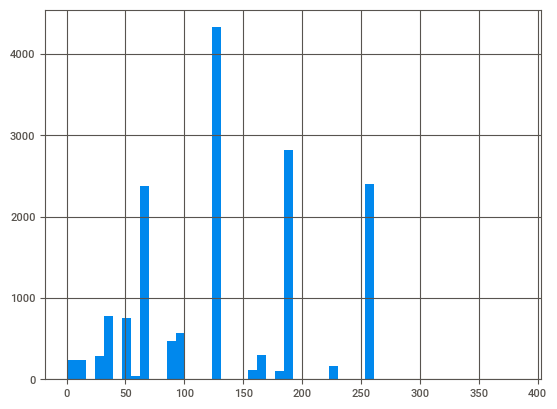

In [30]:
regression_data['total_physical_cores'].hist(bins=50)


<Axes: >

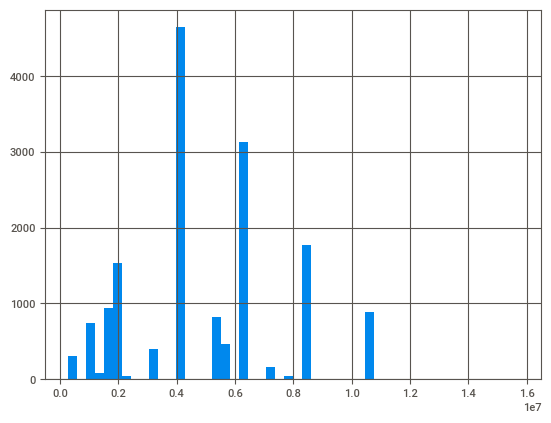

In [31]:
regression_data['combined_L1_cache'].hist(bins=50)



<Axes: >

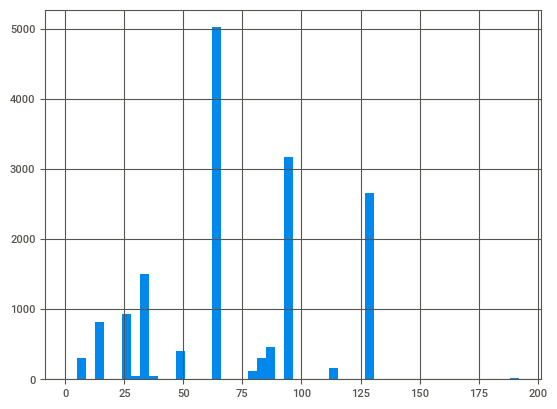

In [32]:
regression_data['socket0_processor_physical_cores'].hist(bins=50)


<Axes: >

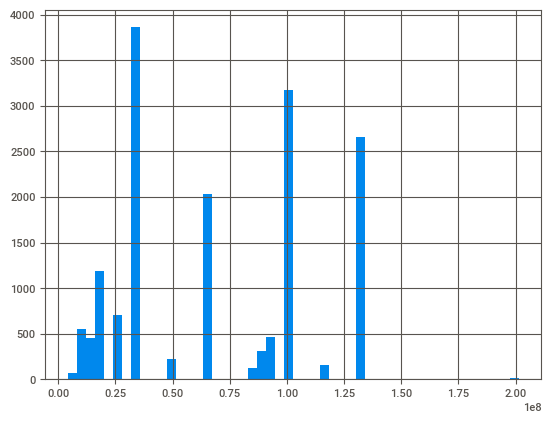

In [33]:
regression_data['combined_L2_cache'].hist(bins=50)


<Axes: >

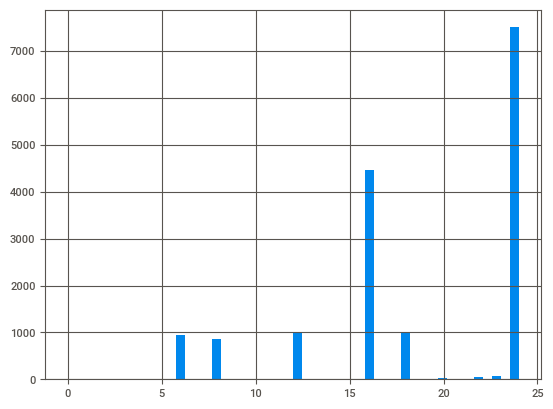

In [34]:
regression_data['memory_channels_populated'].hist(bins=50)

## Test / Train Spit the data

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
train_set, test_set = train_test_split(regression_data,
 test_size=0.2,
 random_state=42,
 shuffle=True)


In [37]:
train_set

,bmc_version,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,...,iteration_start_month,combined_L1_cache,combined_L2_cache,combined_L3_cache,smt_enabled,cpu_turbo_enabled,power_determinism_mode_enabled,patrol_scrub_enabled,optimized_defaults,l3_as_numa
8762,3.54,32,16,16,16,1,-1,-1,-1,-1,...,3,4194304.0,33554432.0,2.684355e+08,False,False,False,False,False,False
10149,2.17,24,24,24,24,1,-1,-1,-1,-1,...,5,6291456.0,100663296.0,2.825820e+08,True,False,False,False,False,False
5120,2.17,28,24,24,24,1,-1,-1,-1,-1,...,1,8388608.0,134217728.0,1.677722e+07,False,False,False,False,False,False
10368,3.51,32,16,16,16,1,-1,-1,-1,-1,...,9,1572864.0,12582912.0,2.013266e+08,True,False,False,False,False,False
921,2.17,24,24,24,24,1,-1,-1,-1,-1,...,10,1572864.0,25165824.0,1.342177e+08,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,2.17,12,6,6,6,1,-1,-1,-1,-1,...,9,1572864.0,25165824.0,6.710886e+07,False,False,False,False,False,False
5390,2.17,28,24,24,24,1,-1,-1,-1,-1,...,4,2097152.0,33554432.0,1.610613e+09,False,False,False,False,False,False
860,2.17,28,24,24,24,1,-1,-1,-1,-1,...,10,3145728.0,50331648.0,2.684355e+08,False,False,False,False,False,False
15795,2.17,24,18,24,18,1,-1,-1,-1,-1,...,6,4194304.0,67108864.0,2.684355e+08,True,False,False,False,False,False


In [38]:
test_set

,bmc_version,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,...,iteration_start_month,combined_L1_cache,combined_L2_cache,combined_L3_cache,smt_enabled,cpu_turbo_enabled,power_determinism_mode_enabled,patrol_scrub_enabled,optimized_defaults,l3_as_numa
15987,2.170000,12,6,6,6,1,-1,-1,-1,-1,...,7,3145728.0,50331648.0,134217728.0,True,False,False,False,False,False
7821,3.540000,32,16,16,16,1,-1,-1,-1,-1,...,3,2097152.0,16777216.0,268435456.0,False,False,False,False,False,False
150,2.170000,28,24,24,24,1,-1,-1,-1,-1,...,10,6291456.0,100663296.0,402653184.0,False,False,False,False,False,False
1684,2.170000,14,12,12,12,1,-1,-1,-1,-1,...,8,6291456.0,100663296.0,402653184.0,False,False,False,False,False,False
2252,2.170000,28,24,24,24,1,-1,-1,-1,-1,...,3,6291456.0,100663296.0,100663296.0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4489,2.170000,24,24,24,24,1,-1,-1,-1,-1,...,11,5505024.0,88080384.0,402653184.0,True,False,False,False,False,True
5151,2.170000,28,24,24,24,1,-1,-1,-1,-1,...,1,8388608.0,134217728.0,16777216.0,False,False,False,False,False,False
7621,2.170000,24,24,24,24,1,-1,-1,-1,-1,...,2,6291456.0,100663296.0,402653184.0,True,False,False,False,False,False
11578,2.567524,8,8,8,8,1,-1,-1,-1,-1,...,5,4194304.0,33554432.0,268435456.0,True,False,False,False,False,False


In [39]:
t_train = train_set['gflops'].copy()
X_train = train_set.drop(labels='gflops', axis=1)
# axis=1 means it's a column in the dataframe

t_train.shape, X_train.shape

((12798,), (12798, 53))

In [40]:
t_test = test_set['gflops'].copy()
X_test = test_set.drop(labels='gflops', axis=1)

t_test.shape, X_test.shape

((3200,), (3200, 53))

In [134]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

In [135]:
pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        ('std_scaler', StandardScaler())])

pipeline.fit(X_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

In [136]:
from sklearn.linear_model import LinearRegression

model = Pipeline([('preprocessing', pipeline),
                 ('lin_reg', LinearRegression())])

In [137]:
model.fit(X_train, t_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('std_scaler', StandardScaler())])),
                ('lin_reg', LinearRegression())])

In [138]:
# Making predictions
y_train = model.predict(X_train)
y_train.shape

(12798,)

In [139]:

y_test = model.predict(X_test)

y_test.shape

(3200,)

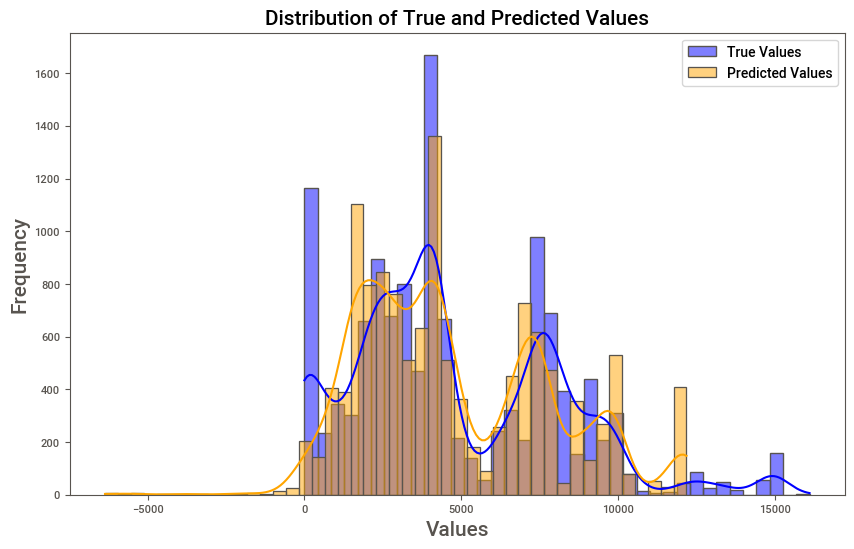

In [140]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(t_train, label='True Values', kde=True, color='blue')
sns.histplot(y_train, label='Predicted Values', kde=True, color='orange')
plt.xlabel('Values', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Distribution of True and Predicted Values', size=15)
plt.legend()
plt.show()


In [141]:
from sklearn.metrics import r2_score

# Assuming y_true contains the actual target values and y_pred contains the predicted values
r_squared = r2_score(t_train, y_train)

print(f'R-squared: {r_squared}')


R-squared: 0.8542687406716617


In [142]:
from sklearn.metrics import mean_squared_error 
# all functions in sklearn.metrics will take (var1, var2)
# var1 is always the target
# var2 is the model prediction

mse_train = mean_squared_error(t_train, y_train)
rmse_train = np.sqrt(mse_train)

print('RMSE Training Set: ', rmse_train)

mse_test = mean_squared_error(t_test, y_test)
rmse_test = np.sqrt(mse_train)

print('RMSE Testing Set: ', rmse_test)

RMSE Training Set:  1263.9624458134972
RMSE Testing Set:  1263.9624458134972


In [143]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(t_train, y_train)
mae

835.9917641790826

In [144]:
# CV
from sklearn.metrics import make_scorer, r2_score
scores = cross_val_score(model, X_train, y_train, cv=10, scoring=make_scorer(r2_score))
scores
cv_scores = np.mean(scores)
print("CV Score:",cv_scores)
linear_std_score = np.std(scores)
print("STD Score:",linear_std_score)

CV Score: -22108934.30710241
STD Score: 46207551.45678477


In [145]:
from sklearn.tree import DecisionTreeRegressor 

# Define the object
model2 = Pipeline([('preprocess',pipeline),
                 ('tree', DecisionTreeRegressor())])

# Train the model
model2.fit(X_train, t_train)

# Make predictions
y_train = model2.predict(X_train)
y_test = model2.predict(X_test)

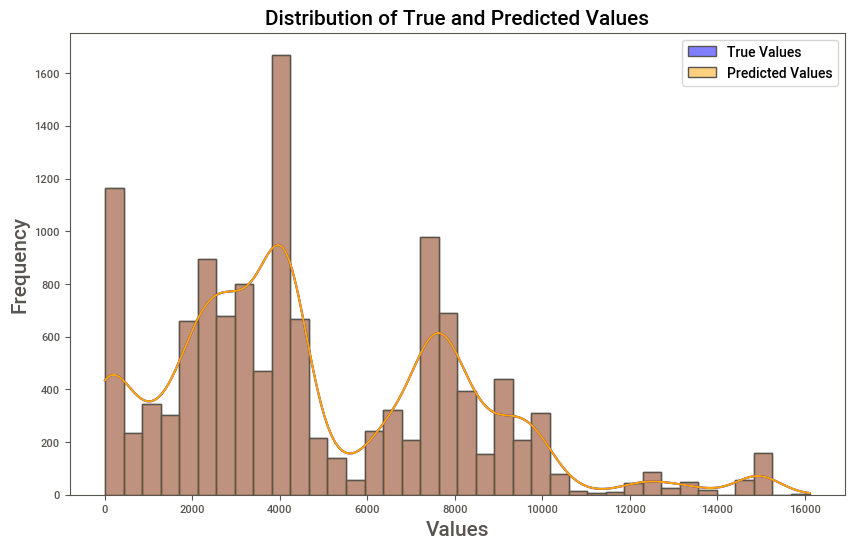

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(t_train, label='True Values', kde=True, color='blue')
sns.histplot(y_train, label='Predicted Values', kde=True, color='orange')
plt.xlabel('Values', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Distribution of True and Predicted Values', size=15)
plt.legend()
plt.show()


In [147]:
from sklearn.metrics import r2_score

# Assuming y_true contains the actual target values and y_pred contains the predicted values
r_squared = r2_score(t_train, y_train)

print(f'R-squared: {r_squared}')


R-squared: 1.0


In [148]:
from sklearn.metrics import mean_squared_error 
# all functions in sklearn.metrics will take (var1, var2)
# var1 is always the target
# var2 is the model prediction

mse_train = mean_squared_error(t_train, y_train)
rmse_train = np.sqrt(mse_train)

print('RMSE Training Set: ', rmse_train)

mse_test = mean_squared_error(t_test, y_test)
rmse_test = np.sqrt(mse_train)

print('RMSE Testing Set: ', rmse_test)

RMSE Training Set:  1.1719486624877325e-14
RMSE Testing Set:  1.1719486624877325e-14


In [149]:
# CV
from sklearn.metrics import make_scorer, r2_score
scores = cross_val_score(model2, X_train, y_train, cv=5, scoring=make_scorer(r2_score))
scores
cv_scores = np.mean(scores)
print("CV Score:",cv_scores)
linear_std_score = np.std(scores)
print("STD Score:",linear_std_score)

CV Score: 0.9689531307586259
STD Score: 0.007685653922640249


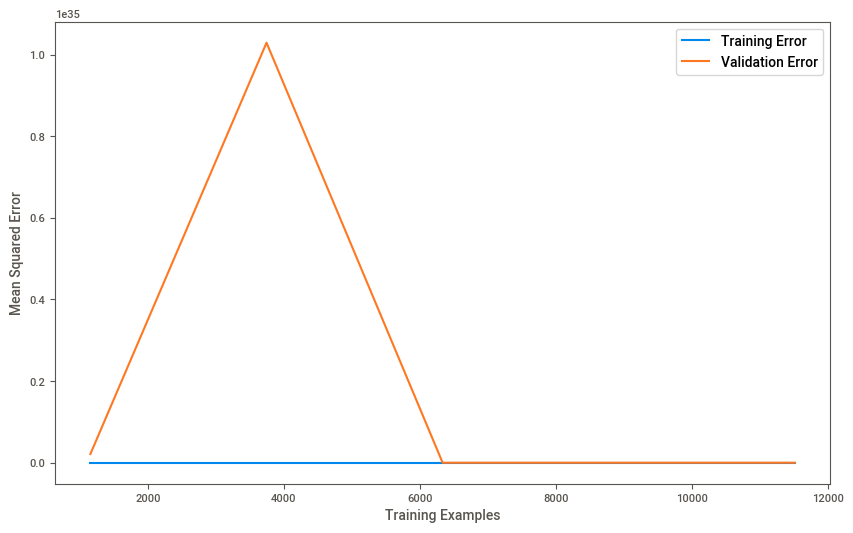

In [150]:
from sklearn.model_selection import learning_curve

# Assuming 'model' is your regression model and X, y are your features and target variable
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Training Error')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Validation Error')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [151]:

from sklearn.ensemble import RandomForestRegressor

# Define object
model3 = Pipeline([('preprocess',pipeline),
                  ('random_forest', RandomForestRegressor())])

# Train model
model3.fit(X_train, t_train)
# Make predictions
y_train = model3.predict(X_train)
y_test = model3.predict(X_test)

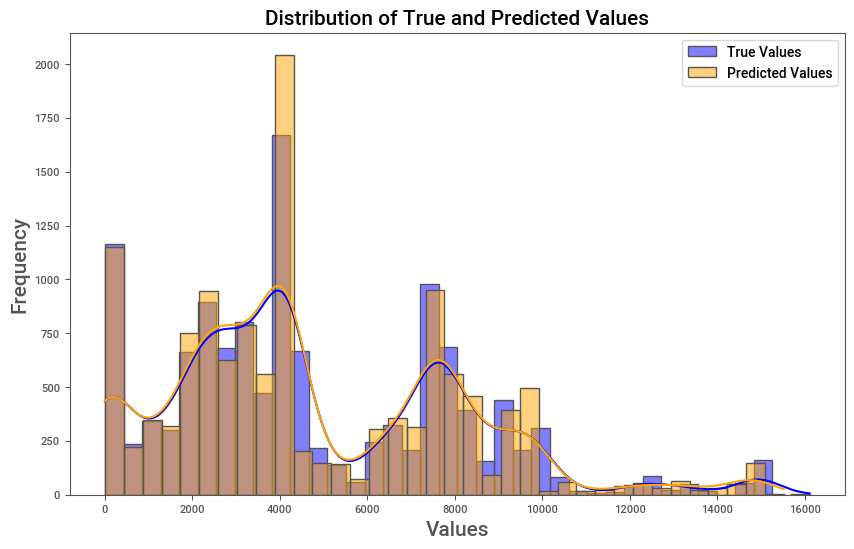

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(t_train, label='True Values', kde=True, color='blue')
sns.histplot(y_train, label='Predicted Values', kde=True, color='orange')
plt.xlabel('Values', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Distribution of True and Predicted Values', size=15)
plt.legend()
plt.show()


In [153]:
from sklearn.metrics import mean_squared_error 
# all functions in sklearn.metrics will take (var1, var2)
# var1 is always the target
# var2 is the model prediction

mse_train = mean_squared_error(t_train, y_train)
rmse_train = np.sqrt(mse_train)

print('RMSE Training Set: ', rmse_train)

mse_test = mean_squared_error(t_test, y_test)
rmse_test = np.sqrt(mse_train)

print('RMSE Testing Set: ', rmse_test)

RMSE Training Set:  167.76446680621558
RMSE Testing Set:  167.76446680621558


In [154]:
# CV
from sklearn.metrics import make_scorer, r2_score
scores = cross_val_score(model3, X_train, y_train, cv=10, scoring=make_scorer(r2_score))
scores
cv_scores = np.mean(scores)
print("CV Score:",cv_scores)
linear_std_score = np.std(scores)
print("STD Score:",linear_std_score)

CV Score: 0.9934951737725634
STD Score: 0.004304242202605704


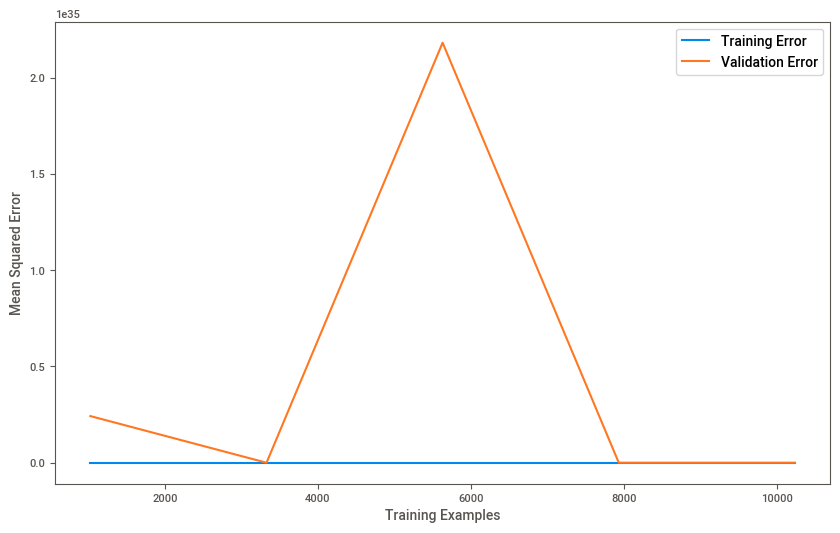

In [155]:
from sklearn.model_selection import learning_curve

# Assuming 'model' is your regression model and X, y are your features and target variable
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Training Error')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Validation Error')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
model4 = Pipeline([('preprocess',pipeline),
    ('poly_feat', PolynomialFeatures()),
                 ('ridge_reg', Ridge())])

model4

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('std_scaler', StandardScaler())])),
                ('poly_feat', PolynomialFeatures()), ('ridge_reg', Ridge())])

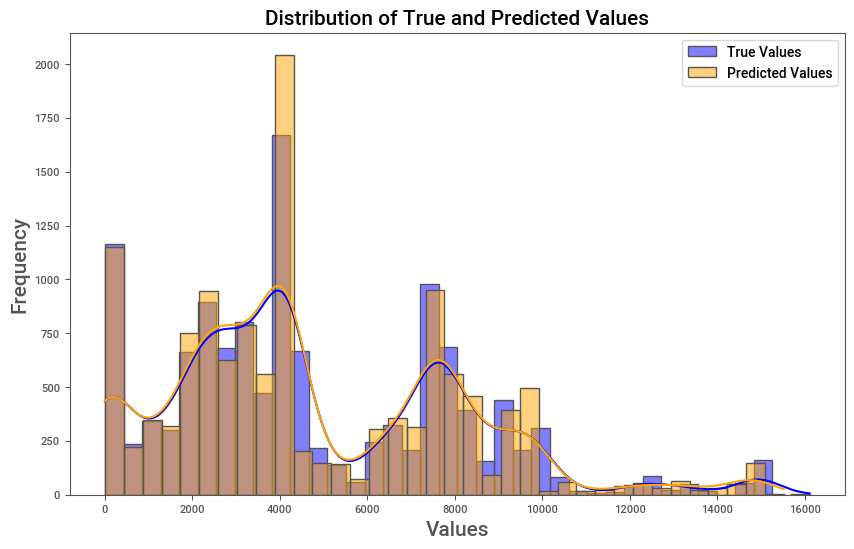

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(t_train, label='True Values', kde=True, color='blue')
sns.histplot(y_train, label='Predicted Values', kde=True, color='orange')
plt.xlabel('Values', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Distribution of True and Predicted Values', size=15)
plt.legend()
plt.show()


In [158]:
from sklearn.metrics import mean_squared_error 
# all functions in sklearn.metrics will take (var1, var2)
# var1 is always the target
# var2 is the model prediction

mse_train = mean_squared_error(t_train, y_train)
rmse_train = np.sqrt(mse_train)

print('RMSE Training Set: ', rmse_train)

mse_test = mean_squared_error(t_test, y_test)
rmse_test = np.sqrt(mse_train)

print('RMSE Testing Set: ', rmse_test)

RMSE Training Set:  167.76446680621558
RMSE Testing Set:  167.76446680621558


In [159]:
# CV
from sklearn.metrics import make_scorer, r2_score
scores = cross_val_score(model4, X_train, y_train, cv=10, scoring=make_scorer(r2_score))
scores
cv_scores = np.mean(scores)
print("CV Score:",cv_scores)
linear_std_score = np.std(scores)
print("STD Score:",linear_std_score)

CV Score: -1.4783546261742183e+34
STD Score: 4.435063878522654e+34


# Experiment Result : 
<div class="alert alert-info">

# Model 1 : Multiple Linear Regression
### Mean Cross-Validation R2 score: -2.75e7
### RMSE Score : 1263.9624458134972
    
# Model 2 : Decision Tree Regressor
### Mean Cross-Validation R2 score: 0.968
### RMSE Score : 1.0521341234
    
# Model 3 : Random Forest Regressor
### Mean Cross-Validation R2 score: 0.992
### RMSE Score : 167.76446680621558
    
# Model 4 : Ridge + PolynomialFeatures
### Mean Cross-Validation R2 score: -1.02e34
### RMSE Score :167.76446680621558
<div/>

